# **Automatidata Project -** 
#### **[Statistical Analysis, Hypothesis Testing and Regression Model]**

This Jupyter Notebook continues Automatidata's project for the client Taxi and Limousine Commission (TLC): to develop a Machine Learning Model using regression analysis, which helps TLC's riders predict fare amounts before a ride. Please note that the data used for this project does not represent New York City's TLC but is just an imitation dataset used for pedagogical reasons and the purpose of this project. 

TLC has asked Automatidata to consider the relationship between fare amount and payment type because they would like a detailed statistical analysis of payment type. That is, do customers who use a credit card pay higher fare amounts than those who use cash? 

Hence taking into account the ask of TLC, the goal of this Jupyter Notebook is to - 
1) Conduct statistical analysis of the data and explore the relationship between fare amount and payment type
2) Test the hypothesis that the customers who use a credit card pay higher fare amounts
3) Should Automatidata conclude that there is a statistically significant relationship between credit card payment and fare amount, discuss the next steps: what our thoughts are on strategies TLC's team could implement to encourage customers to pay with a credit card?
4) Build the Regression Model for predicting fare rates for rides before a ride. 

# **Statistical Analysis and Hypothesis Testing -**

In [1]:
# Importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
# Loading the dataset that we worked with in the previous Jupyter Notebook
df = pd.read_csv(r"D:\Files On This Laptop (Not Cloud)\xps 16 9640\Documents\Data Analytics Career Requirements\PORTFOLIO ESSENTIALS\2017_Yellow_Taxi_Trip_Data.csv")

In [3]:
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,04/15/2017 6:05:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


As we are interested in examining the relationship between the **`fare amount`** and the **`type of payment`** as requested by our client TLC, we shall use the approach of understanding this through the **`average`** fare amount for each payment type.  

In [4]:
# Examining the fare amount for each payment type in the dataset.
df.groupby(['payment_type'])['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Just as a reminder, According to the data, the **`payment method`** is encoded as follows:

1)   **1 = Credit card**
2)   **2 = Cash**
3)   **3 = No charge**
4)   **4 = Dispute**
5)   **5 = Unknown**
6)   **6 = Voided trip**

From the output of the above code, it is evident that the mean fare amount for credit cards is **`1.216202 is ~ 1`** which means that customers who make payments from credit cards tend to pay slightly more on average than those who pay by cash. But this reasoning is most likely a result of random sampling rather than the actual difference in fare amount. To negate this doubt and assess if this result is statistically significant or just an occurrence by chance, we need to conduct a hypothesis test for the same. 

We first start by defining the Null and Alternative Hypothesis - 

***$H_0$* : The difference between the Mean Fare Amount and the Payment Type is `not` statistically significant** 

***$H_1$* : The difference between the Mean Fare Amount and the Payment Type `is` statistically significant**

After defining *$H_0$* and *$H_1$*, it is important to choose a significance level and then find the p-value. We chose a `significance level of 5%` which is **0.05** for this purpose. This means that we are considering a 5% probability of rejecting the null hypothesis when it is true.  

The third step after choosing the significance level of 0.05 is to find the p-value which we will do in the below code. 

We have used a **`Two-Sample T-test`** to find out the P-value because `T-tests are designed to compare means (average values) from different groups`. It relies on the properties of a normal distribution, particularly when the sample size is large enough due to the Central Limit Theorem which states that the sampling distribution of the sample mean will be normally distributed regardless of the shape of the population distribution, provided that the sample size is large enough. 

In [5]:
# Calculating the p-value using the code for a two sample t-test
credit_card = df[df['payment_type']==1]['fare_amount']
cash = df[df['payment_type']==2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=np.float64(6.866800855655372), pvalue=np.float64(6.797387473030518e-12), df=np.float64(16675.48547403633))

After calculating the p-value as done using the above code, the final step is either accepting or rejecting the null hypothesis after comparing the p-value with the significance level. 

The above result clearly shows that the p-value is **6.797387473030518e-12**. The portion of this value e-12 is a scientific notation which is a way to express a very small or a very large number simply. **$6.797 \times 10^{-12}$ is equal to 0.000000000006797** which is a very small number when compared to the significance level of **0.05**. Since 0.000000000006797 (p-value) < 0.05 (significance level) we reject the null hypothesis and **conclude that the difference between the mean fare amount and the payment type is statistically significant and the difference is **`not`** just by chance**.  

-----

### **Some Analysis & Suggested Strategies**

From the above result of the hypothesis test where we concluded that **the higher mean fare amount for the payment type - credit card payment, is not by chance and is statistically significant**, we can advise TLC to urge their customers to make payments through credit cards. This will increase TLC's revenue. 

**Please Note -**

This project assumes that the customers were forced to make payments only in one or the other way and once payments were made that particular way, they always complied with it. 

# **Regression Model Building, Testing and Evaluation -**

Now this part of the Jupyter Notebook aims at building the Machine Learning model using Regression which aims to predict the fare amounts before a ride. 

## **Importing the required Packages** 

In [6]:
# Importing necessary packages and libraries for Ordinary Least Squares (OLS), Multiple Linear Regression (MLR) and Confusion Matrix. 
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as variance_inflation_factor
import sklearn.metrics as metrics 
from sklearn.preprocessing import StandardScaler as StandardScaler
from sklearn.linear_model import LinearRegression as LinearRegression 
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Data Cleaning**

#### **1) Removing Nulls and Duplicates**

In [7]:
# Some Data Cleaning and EDA before building the model. 
print("The shape of the dataframe is :", df.shape)
print("The shape of the dataframe with duplicates dropped is :", df.drop_duplicates().shape)
print("The total count of missing values is :", df.isna().sum().sum())
print("Missing Values per column :")
df.isna().sum()

The shape of the dataframe is : (22699, 18)
The shape of the dataframe with duplicates dropped is : (22699, 18)
The total count of missing values is : 0
Missing Values per column :


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

From the above output, it is evident that columns **`tpep_pickup_datetime`** and **`tpep_dropoff_datetime`** are in the **`object`** data type. Hence, we need to convert them to the **`datetime`** data type. The below code does the same.   

#### **2) Converting the data types of the required variables**

In [10]:
# Check the data type of the columns before conversion to datetime. 
print("The Data Type of 'tpep_pickup_datetime' is :", df['tpep_pickup_datetime'].dtype)
print("The Data Type of 'tpep_dropoff_datetime' is :", df['tpep_dropoff_datetime'].dtype)

# Converting the data type from object to datetime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Displaying the datatypes of the converted columns 
print("The Data Type of 'tpep_pickup_datetime' now is :", df['tpep_pickup_datetime'].dtype)
print("The Data Type of 'tpep_dropoff_datetime' now is :", df['tpep_dropoff_datetime'].dtype)

The Data Type of 'tpep_pickup_datetime' is : object
The Data Type of 'tpep_dropoff_datetime' is : object
The Data Type of 'tpep_pickup_datetime' now is : datetime64[ns]
The Data Type of 'tpep_dropoff_datetime' now is : datetime64[ns]


In [11]:
# Lets check if the changes were made. 
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Now, we will create a `duration` column to represent the total number of minutes each taxi ride took

In [12]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

From the above output, we can now confirm that the **`duration`** column was added with a `float64` data type.  

#### **3) Dealing with Outliers**

We will not be using each and every column in the dataset to build our regression model. But the most important variables that we need to look into for outliers before we build our model is - 

* `fare_amount`
* `trip_distance`
* `duration`

Till now in our data cleaning process, we checked for null values, duplicates, converted the data types of the required columns and created a duration column on the basis of the prior Jupyter Notebook's EDA analysis. Now we need to check for outliers for each of the above variables and if it will affect our data or not. We will do that using boxplots from the `seaborn` package for each of the above 3 features. 

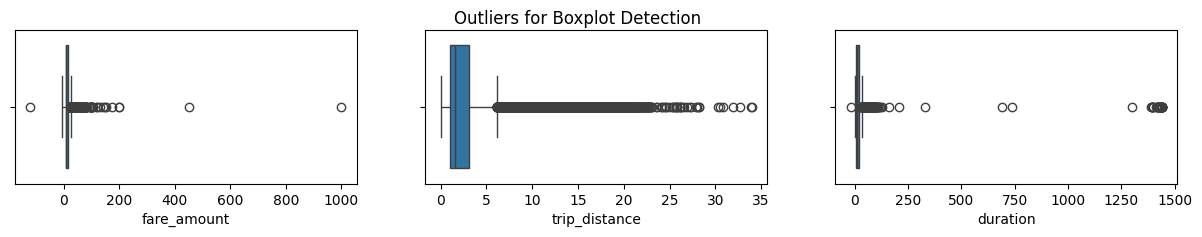

In [14]:
# Creating Boxplots for each of the 3 features - fare_amount, trip_distance and duration. 
fig, axes = plt.subplots(1,3, figsize=(15,2))
fig.suptitle("Outliers for Boxplot Detection")
sns.boxplot(ax=axes[0], x=df['fare_amount'])
sns.boxplot(ax=axes[1], x=df['trip_distance'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

* From the above boxplots, it is evident that all the 3 variables have ouliers. Some are extreme and others not so much.
* In the `trip_distance` boxplot (2nd boxplot) from 5 miles to around 30 and odd miles are all like a stright line. so it is okay to leave it as it is.
* But, the `fare_amount` and `duration` boxplots (that is the first and the third one) have problematic outliers with extreme values in the higher ends.
* So only the 2nd boxplot - that is `trip_distance` it is okay to leave it as is. 

**TRIP DISTANCE OUTLIERS**

Let's recap the overall analysis and conclusions from the previous Jupyter Notebook titled - **`Automatidata Project Portfolio - EDA`**. After we understood and analysed the data we analysed the following points - 

**1)** Negative Fare amounts

**2)** 0 Trip Distance

**3)** The Trip Distance Box Plot (Which we are analyzing in the above boxplot)

**4)** Data Includes Drop-off and Pick-up Times (Which we converted to `datetime` datatype from `object` datatype to find out the trip `duration` for          which we created a new column in the dataset)

Now we will deal with the 2nd point mentioned above, `0 trip distance`. So we need to find out if the trip distances are very short distances rounded off to 0 or if 0 trip distance bad data. The below code helps us figure that out. 

#### **0 Trip Distance**

In [15]:
# Are the 0 trip distances very short distances rounded off or are they just bad data?
sorted(set(df['trip_distance']))[:101]

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0]

From the above output, we can clearly say that they are just short distances rounded off to 0. It might be possible to have 0 trip distances in the following cases - 
1) This may indicate passenger trip cancellations by a passenger because of which the vehicle did not move.
2) faulty GPS systems in the cab may have failed to record the distance

In the above output, there are 100 entries with 0 trip distances. The value 100 was figured out by trial and error in the number typed between the square brackets. 101 is the number typed to show that from the 101st data point, the trip distance is 1. 

Now it becomes essential to figure out how many trip distances are a value of 0. The below code shows the accurate figure as the above estimation is just trial and error and may not be accurate due to human error. 

In [16]:
sum(df['trip_distance']==0)

148

From the above output, it is clear that there are 148 data points with a trip distance of 0. this means 148 out of 22,699 that is 0.65 % of the dataset which is a very insignificant amount. Therefore **the `trip distance` column will remain untouched with regards to outliers**. 

**FARE AMOUNT OUTLIERS**

In this portion, we will examine the outliers concerning fare amounts. In this regard, when we conducted EDA, one of our 4 major analyses was `'Negative Fare Amounts'`. To recap, the analysis from the previous Jupyter Notebook was as follows - 

When reviewing the df.describe() function's output as run in the below code once again for reference, The minimum fare amount of **-120.00**, a minimum extra amount of **-1.00**, mta tax of **-0.50**, Improvement surcharge of -0.30, and the total amount of **-120.30** stand out. Minus values for a fare do not seem to be possible but can be possible in the following scenarios -

1) If a ride service offers a discount voucher or credit greater than the actual fare amount, the system may display a negative fare temporarily. For example, a fare of 1000 dollars with a voucher of 1200 dollars might result in a displayed balance of -20 dollars
2) A negative entry might have occurred due to incorrect entries in fare calculations.
3) If a fare is overcharged to the customer and requires adjustment, a negative amount may be shown in the system as the refund to be issued to the customer/user.
4) A ride may show negative balances if cashback or credits are applied to the user's account for future rides.
5) Incorrect handling of currency exchange rates or sign conventions during cross-border payments could result in a negative fare.

But again, in standard operations, an overpayment or refund in the case of point number 3, is processed separately and is not expected to show up as a negative fare.

So we need to understand how to deal with these negative fare amounts which we will do in the following codes. 

In [17]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


In [18]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare amount column is large and extreme values do not make much sense. 
The **`Low Values`** are negative fare amounts which is usually not possible unless as mentioned above. 
The **`High Values`** are as high as \\$1000 for a highly unlikely ride. High values for this feature `fare_amount` can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8 (14.50 - 6.50). The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6` instead of `1.5`, which results in a cap of $62.50.

In [19]:
# Imputing the values below $0 with 0 
df.loc[df['fare_amount']<0, 'fare_amount'] = 0
df['fare_amount'].min()

np.float64(0.0)

The high values will be imputed as the Interquartile range, which is usually calculated using the standard formula Q3 + 1.5 * IQR. We will impute upper-limit values in specified columns based on their interquartile range.
The Arguments in the code below are explained here as follows:
* column_list: A list of columns to iterate over
* iqr_factor: A number representing x in the formula:
              Q3 + (x * IQR). Used to determine the maximum threshold,
              beyond which a point is considered an outlier.

The IQR is computed for each column in column_list and values exceeding the upper threshold for each column are imputed with the upper threshold value.

In [20]:
# Imputing the high values
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate the upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [21]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



**DURATION OUTLIERS**

In [22]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.
* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [23]:
# Imputing the negative values with 0
df.loc[df['duration']<0, 'duration'] = 0
df['duration'].min()

np.float64(0.0)

In [24]:
# Imputing high values with Q3 + (6 * IQR). 
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



## **Build the Muliple Linear Regression Model**

From the above data cleaning, we did analyze that the three most important variables that we wil be using to build the model to predict taxi fares before a ride are - 

1) `fare_amount`
2) `trip_distance`
3) `duration`

### **STEP 1 - Creating the Required Columns** 

We created the duration column which has data points on the trip duration in minutes. The issue is that, while building the model that is meant to predict taxi fares, we cannot use just `duration`, because the model will not know what fare to predict until after a ride has occurred. However, a model can predict based on fare amounts that have already transpired on trips. 

Below are various columns that we need to create which will help us build the regression model. 

#### **1) `Mean_Distance` Column**

So, to help build the model, we shall first create a `mean_distance` column that calculates the mean value of all the trips that have transpired that start and end with the same location. 

For instance, if our data looks like the following, 

|Trip|Start Point|End Point|Distance|
|--: |:---------:|:-------:|--:|
| 1  |     A     |    B    |3.5|
| 2  |     C     |    D    |2.0|
| 3  |     A     |    B    |1.5|
| 4  |     E     |    F    |8.0|

And we create the `Mean_Distance` column, then the data will look like the following - 

|Trip|Start Point|End Point|Distance|Mean_distance|
|--: |:---------:|:-------:|:------:|:--    |
| 1  |     A     |    B    |  3.5   |  2.5  | 
| 2  |     C     |    D    |  2.0   |  2.0  |
| 3  |     A     |    B    |  1.5   |  2.5  |
| 4  |     E     |    F    |  8.0   |  8.0  |

The `Mean_Distance` column is added to the original dataset, the mean distance of the two trips from A to B has been calculated and the mean value has been put in place. We need to follow a similar logic for our dataset for building the predictive model for TLC. 

Hence we will create a `mean_distance` column. Before that, we will create a helper column called `pickup_dropoff` which will contain all the unique combinations of pickup and dropoff locations to help create the `mean_distance` column. 

In [25]:
# Creating the helper column named `pickup_dropoff` for the dataset. 
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [26]:
Grouped_Data = df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['trip_distance']]
Grouped_Data[:10]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


In [27]:
# Converting Grouped_Data to a dictionary and reassigning it to only contain the inner dictionary.
Grouped_Data_Dict = Grouped_Data.to_dict()
Grouped_Data_Dict = Grouped_Data_Dict['trip_distance']

In [28]:
# Creating the `mean_distance` column which is a copy of the `pickup_dropoff` column.
df['mean_distance'] = df['pickup_dropoff']

# Mapping `Grouped_Data_Dict` to the `mean_distance` column. 
df['mean_distance'] = df['mean_distance'].map(Grouped_Data_Dict)

# Confirming that the above codes worked - 1. 
df[(df['PULocationID']==100) & (df['DOLocationID']==125)][['mean_distance']] # 9th pickup_dropoff value (100 125) from the above output 

,mean_distance
17048,2.84
18384,2.84


In [29]:
# Confirming that the above codes worked - 2. 
df[(df['PULocationID']==100) & (df['DOLocationID']==1)][['mean_distance']]   # 3rd pickup_dropoff value (100 1) from the above output 

,mean_distance
13496,16.89


In [30]:
# Confirming that the above codes worked - 3. 
df[(df['PULocationID']==100) & (df['DOLocationID']==113)][['mean_distance']]  # 6th pickup_dropoff value (100 1) from the above output 

,mean_distance
11489,2.024
12308,2.024
21039,2.024
22167,2.024
22468,2.024


#### **2) `Mean_Duration` Column**

By repeating the process used to create the `mean_distance` column, we create the `mean_duration` column. 

In [31]:
Grouped_Data = df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['duration']]
Grouped_Data[:10]

# Converting Grouped_Data to a dictionary and reassigning it to only contain the inner dictionary.
Grouped_Data_Dict = Grouped_Data.to_dict()
Grouped_Data_Dict = Grouped_Data_Dict['duration']

# Creating the `mean_duration` column which is a copy of the `pickup_dropoff` column.
df['mean_duration'] = df['pickup_dropoff']

# Mapping `Grouped_Data_Dict` to the `duration` column. 
df['mean_duration'] = df['mean_duration'].map(Grouped_Data_Dict)

# Confirming that the above codes worked - 1. 
df[(df['PULocationID']==100) & (df['DOLocationID']==125)][['mean_duration']] # 9th pickup_dropoff value (100 125) from the above output 

,mean_duration
17048,17.608333
18384,17.608333


In [32]:
# Confirming that the above codes worked - 2. 
df[(df['PULocationID']==100) & (df['DOLocationID']==1)][['mean_duration']]   # 3rd pickup_dropoff value (100 1) from the above output 

,mean_duration
13496,48.183333


In [33]:
# Confirming that the above codes worked - 3. 
df[(df['PULocationID']==100) & (df['DOLocationID']==113)][['mean_duration']]  # 6th pickup_dropoff value (100 1) from the above output 

,mean_duration
11489,14.453333
12308,14.453333
21039,14.453333
22167,14.453333
22468,14.453333


#### **3) `Day and Month` Column**

In [34]:
# Creating a Day and Month Column 
df['Day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['Month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### **4) `Rush Hour` Column**

A Rush Hour refers to 
* Any weekday (that is, not a Saturday or Sunday)
* Either from 6:00 am to 10:00 am or from 4:00 pm to 8:00 pm (that is, 16:00 - 20:00)

Below, we are creating a Rush Hour column in binary form that returns 1 if the ride was during a rush hour and 0 if it was not. 

In [35]:
# Craeting a Rush Hour column 
df['Rush_Hour'] = df['tpep_pickup_datetime'].dt.hour 

# Imputing a 0 if the day was a Saturday or Sunday
df.loc[df['Day'].str.lower().isin(['saturday', 'sunday']), 'Rush_Hour'] = 0

In [36]:
# Function to calculate the rush hour function
def rush_hour_calculator(hour):
    if (6 <= hour['Rush_Hour'] < 10) or (16 <= hour['Rush_Hour'] < 20):
        val = 1
    else:
        val = 0
    return val

In [37]:
# Ensuring the day column is correctly referecned 
df['Rush_Hour'] = df.apply(rush_hour_calculator, axis=1)

# Imputing a 0 if the day was a Saturday or Sunday
df.loc[df['Day'].str.lower().isin(['saturday', 'sunday']), 'Rush_Hour'] = 0
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month,Rush_Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### **STEP 2 - Constructing a Scatter Plot** 

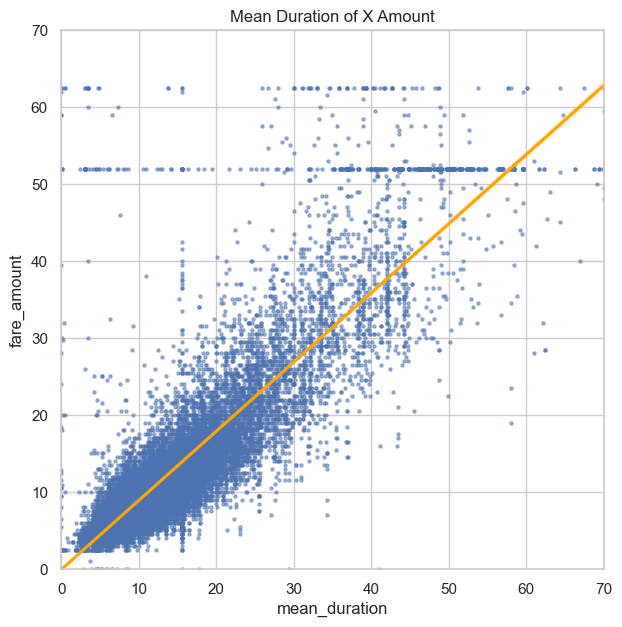

In [38]:
# Constructing a Scatter Plot to analyze the relationship between the `mean_duration` and `fare_amount`. 
sns.set(style='whitegrid')
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(7)
sns.regplot(x=df['mean_duration'],
            y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'orange'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title("Mean Duration of X Amount")
plt.show();

From the above scatter plot, we can clearly say that `mean_duration` and `fare_amount` are correlated as there is an approximately straight line around the `orange` best-fit line. But there are two horizontal lines at \\$52 and \\$63. The \\$63 represents the highest values that were imputed with \\$62.50 using the interquartile range. But we need to figure out what the \\$52 horizontal line represents. 

In [39]:
df[df['fare_amount']>50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

From the above output, we can clealry say that there were 514 trips who had a fare amount of \\$52. We will examine the first 30 of these 514 trips. 

In [40]:
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month,Rush_Hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


Most of the above 30 trips that have a fare amount of \\$52 have either a Pickup Location ID or Dropoff Location ID of code `132` for no apparent reason because these rides seem to have occured at different dates, at different times with all the vendors. 

The MTA tax was \\$0.5 for all the 30 rides, there was 0 extra amount paid excpet for 4 trips of an amount of \\$4.5. The Improvement surcharge was a constant \\$0.3. 

The toll amounts if paid were either \\$5.54 or \\$5.76. 

The data dictionary says that **`RatecodeID` of 2** indicates trips for **JFK, which is John F. Kennedy International Airport** - A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### **STEP 3 - Isolating the Modelling Variables**

The idea of this step of the model building process is to drop the irrelevant variables and only keep the variables that we need for this model.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [42]:
df_ML_Model = df.copy()

df_ML_Model = df_ML_Model.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
                                'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                                'improvement_surcharge', 'total_amount', 'duration', 'pickup_dropoff', 'Day', 'Month'], axis=1)

df_ML_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       22699 non-null  int64  
 1   VendorID         22699 non-null  int64  
 2   passenger_count  22699 non-null  int64  
 3   fare_amount      22699 non-null  float64
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
 6   Rush_Hour        22699 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


### **STEP 4 - Creating a Pairplot**

We construct a Pairplot to visualize the relationship between `mean_duration`, `mean_distance` and `fare_amount`. 

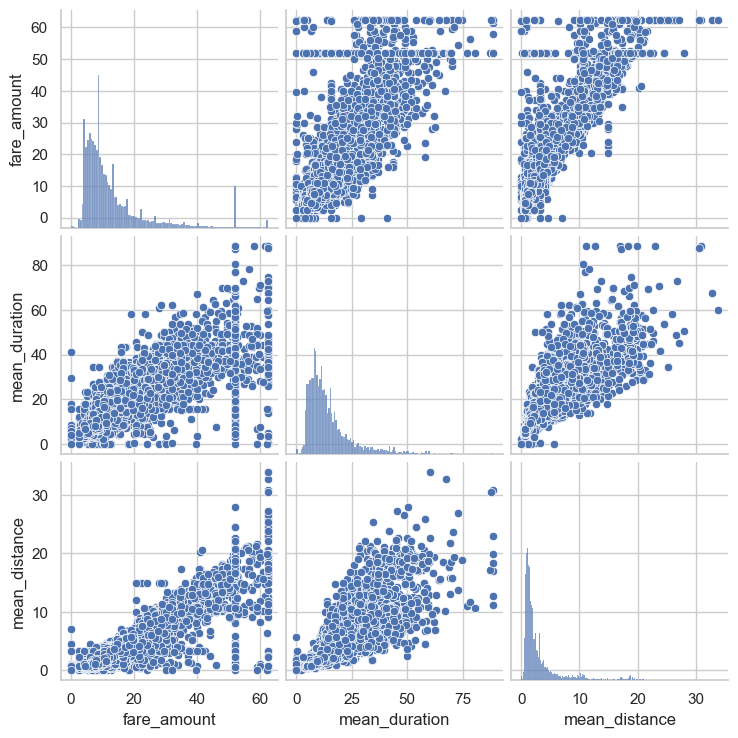

In [43]:
sns.pairplot(df_ML_Model[['fare_amount', 'mean_duration', 'mean_distance']]);

All the variables `fare_amount`, `mean_duration` and `mean_distance` seem to have an approximately linear relationship. Please note that the `duration` variable represents the mean duration as calculated prior in this Jupyter Notebook. 

### **STEP 5 - Identifying Correlations**

In [44]:
# Creating a Correlation Matrix using Karl Pearson's Coefficient of Correlation. 
df_ML_Model.corr(method='pearson')

,Unnamed: 0,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,Rush_Hour
Unnamed: 0,1.000000,0.003698,0.004965,0.013442,0.006807,0.014032,-0.012203
VendorID,0.003698,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.004965,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.013442,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.006807,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.014032,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
Rush_Hour,-0.012203,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


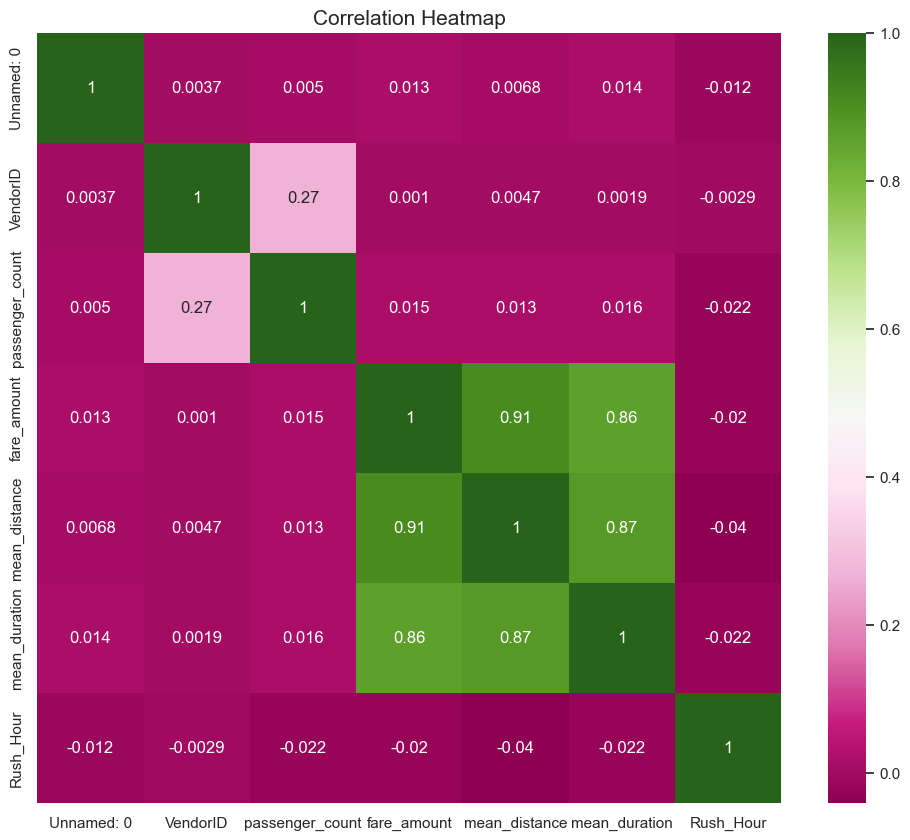

In [45]:
# Visualizing a correlation heatmap of the data. 
plt.figure(figsize=(12,10))
sns.heatmap(df_ML_Model.corr(method='pearson'), annot=True, cmap='PiYG')
plt.title("Correlation Heatmap", fontsize=15)
plt.show();

Both the `mean_diatance` and the `mean_duration` are both highly correlated with the `fare_amount`. They are also highly correlated with each other with a Pearson correlation of 0.87. 

As a recap, highly correlated predictor variables may be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model due to the problem of overfitting where the model performs extremely well on training data but its performance is considerably worse when evaluated using the unseen test data. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about the data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, the attempt is to try modeling with both variables even though they are correlated.

### **STEP 6 - Splitting the Data into Outcome Variables and Features**

In [46]:
df_ML_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       22699 non-null  int64  
 1   VendorID         22699 non-null  int64  
 2   passenger_count  22699 non-null  int64  
 3   fare_amount      22699 non-null  float64
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
 6   Rush_Hour        22699 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


Setting up the X and Y variables in the below code where the Features are X variables and Y is the Outcome variable. 

In [47]:
X = df_ML_Model.drop(columns=['fare_amount'])
Y = df_ML_Model[['fare_amount']]
X.head()

,Unnamed: 0,VendorID,passenger_count,mean_distance,mean_duration,Rush_Hour
0,24870114,2,6,3.521667,22.847222,0
1,35634249,1,1,3.108889,24.470370,0
2,106203690,1,1,0.881429,7.250000,1
3,38942136,2,1,3.700000,30.250000,0
4,30841670,2,1,4.435000,14.616667,0


### **STEP 7 - Pre-Process the Data & Split the Data into Traning and Tests**

From the above output, it is evident that the VendorID variable is a categorical variable with either output 1 or 2. We will be converting the above categorical variable to a dummy variable (Just like how Rush Hour looks), that is, in the form of 0s and 1s. 

In [48]:
print("The Columns in the Dataframe are :", X.columns)

The Columns in the Dataframe are : Index(['Unnamed: 0', 'VendorID', 'passenger_count', 'mean_distance',
       'mean_duration', 'Rush_Hour'],
      dtype='object')


In [49]:
if 'VendorID' in X.columns:
    X['VendorID'] = X['VendorID'].astype(str)
    print("The Unique Values in 'VendorID' Column is :", X['VendorID'].unique())
    X = pd.get_dummies(X, columns=['VendorID'], drop_first=True)
    print(X.head())
else:
    print("Column 'VendorID' not Found in the DataFrame")

The Unique Values in 'VendorID' Column is : ['2' '1']
   Unnamed: 0  passenger_count  mean_distance  mean_duration  Rush_Hour  \
0    24870114                6       3.521667      22.847222          0   
1    35634249                1       3.108889      24.470370          0   
2   106203690                1       0.881429       7.250000          1   
3    38942136                1       3.700000      30.250000          0   
4    30841670                1       4.435000      14.616667          0   

   VendorID_2  
0        True  
1       False  
2       False  
3        True  
4        True  


In [50]:
# Converting the VendorID_2 column back to integers which gives us the dummy values in the form of 0 and 1. 
X['VendorID_2'] = X['VendorID_2'].astype(int)
X.head()

,Unnamed: 0,passenger_count,mean_distance,mean_duration,Rush_Hour,VendorID_2
0,24870114,6,3.521667,22.847222,0,1
1,35634249,1,3.108889,24.470370,0,0
2,106203690,1,0.881429,7.250000,1,0
3,38942136,1,3.700000,30.250000,0,1
4,30841670,1,4.435000,14.616667,0,1


In [51]:
# Splitting the data into training and test datasets. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### **STEP 8 - Fitting & Evaluating the Model through the Train and Test Data**

In [52]:
# Standardizing the X variables. 
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print("The standardized X_train data looks like :")
X_train_scaled

The standardized X_train data looks like :


array([[-0.7801092 , -0.50301524,  0.8694684 ,  0.17616665, -0.64893329,
         0.89286563],
       [-0.70001006, -0.50301524, -0.60011281, -0.69829589,  1.54099045,
         0.89286563],
       [-0.38979013,  0.27331093, -0.47829156, -0.57301906, -0.64893329,
        -1.11998936],
       ...,
       [ 1.15399447, -0.50301524, -0.45121122, -0.6788917 , -0.64893329,
        -1.11998936],
       [-1.58946814, -0.50301524, -0.58944763, -0.85743597,  1.54099045,
        -1.11998936],
       [ 0.28454574,  1.82596329,  0.83673851,  1.13212101, -0.64893329,
         0.89286563]], shape=(18159, 6))

In [53]:
# Fitting the model to the training data. 
Model = LinearRegression()
Model.fit(X_train_scaled, Y_train)

LinearRegression()

In [54]:
# Evaluation of the Training Data by calculating the Residual Sum of Squares and explained variance (R^2 score), Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.
R_Squared = Model.score(X_train_scaled, Y_train)
print("The Co-efficient of Determination is :", R_Squared)
Y_pred_train = Model.predict(X_train_scaled)
print("R Squared: ", r2_score(Y_train, Y_pred_train))
print("Mean Absolute Error: ", mean_absolute_error(Y_train, Y_pred_train))
print("Mean Squared Error: ", mean_squared_error(Y_train, Y_pred_train))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

The Co-efficient of Determination is : 0.839877088274981
R Squared:  0.839877088274981
Mean Absolute Error:  2.186595604267976
Mean Squared Error:  17.88597646620374
Root Mean Squared Error:  4.229181536208128


In [55]:
# Scaling the X Test Data.
X_scaled_test = scaler.transform(X_test)

In [56]:
# Evaluating the model performance on the Testing Data. 
R_Squared_test = Model.score(X_scaled_test, Y_test)
print("The Co-efficient of Determination is :", R_Squared_test)
Y_pred_test = Model.predict(X_scaled_test)
print("R Squared: ", r2_score(Y_test, Y_pred_test))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred_test))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

The Co-efficient of Determination is : 0.8682584531139055
R Squared:  0.8682584531139055
Mean Absolute Error:  2.1329377430563494
Mean Squared Error:  14.326444485690207
Root Mean Squared Error:  3.785028994035608


**SOME ANALYSIS -**

The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfitted. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

### **STEP 9 - Getting the Results of the Model**

In [57]:
# Creating a Results Dataframe.
Results = pd.DataFrame(data={'Actual': Y_test['fare_amount'],
                             'Predicted': Y_pred_test.ravel()})
Results['Residual'] = Results['Actual'] - Results['Predicted']
Results.head(10)

,Actual,Predicted,Residual
5818,14.0,12.440973,1.559027
18134,28.0,16.300825,11.699175
4655,5.5,6.648107,-1.148107
7378,15.5,16.151018,-0.651018
13914,9.5,10.432898,-0.932898
308,23.5,20.865784,2.634216
3061,39.5,37.114710,2.385290
12401,57.5,37.623959,19.876041
5662,24.5,22.942059,1.557941
21767,8.0,8.611166,-0.611166


### **STEP 10 - Visualizing the Results**

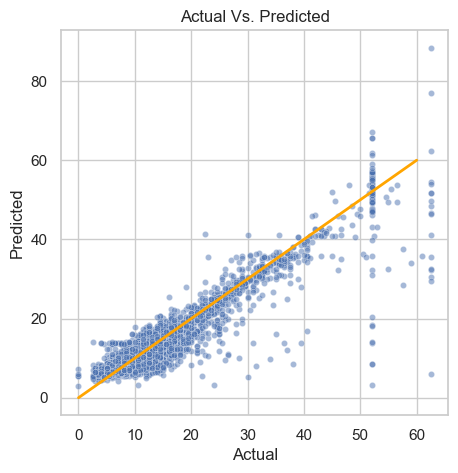

In [58]:
# Creating a Scatter Plot of Actual Vs. Predicted results from the Results Dataset. 
fig, ax = plt.subplots(figsize=(5,5)) 
sns.set(style='whitegrid')
sns.scatterplot(x='Actual',
                y='Predicted',
                data=Results,
                alpha=0.5,
                s=20, 
                ax=ax)
plt.plot([0,60], [0,60], c='orange', linewidth=2)
plt.title("Actual Vs. Predicted")
plt.show();

The diagram below dipicts a visualization of the Distribution of the Residuals using a Histogram. 

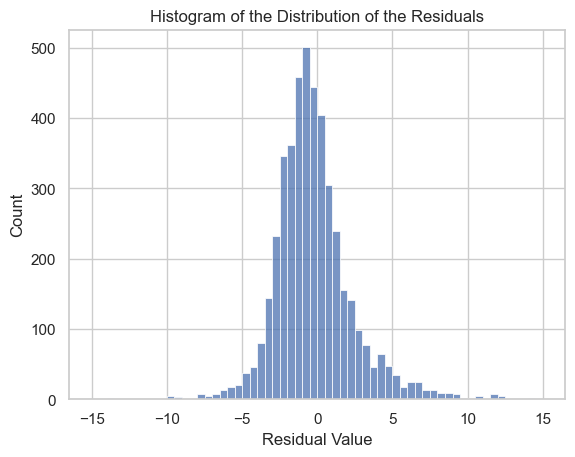

In [59]:
# Visualization of the Residuals using a Histogram. 
sns.histplot(Results['Residual'], bins=np.arange(-15, 15.5, 0.5))
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.title("Histogram of the Distribution of the Residuals")
plt.show();  

In [60]:
Results['Residual'].mean()

np.float64(-0.015569709936070712)

**SOME ANALYSIS -**

The distribution of the residuals is approximately normal and has a mean of -0.01544. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

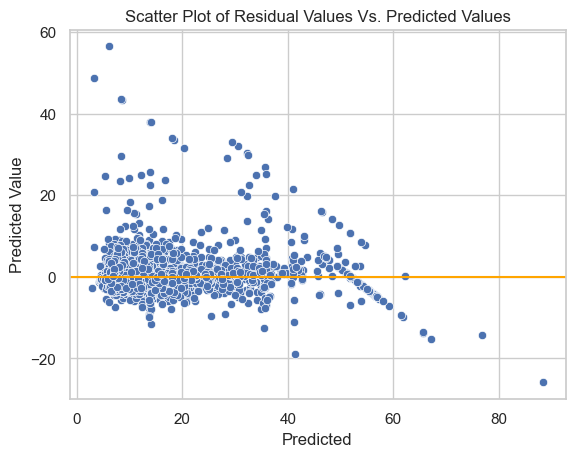

In [61]:
# Scatter Plot of the Residuals Vs. Predicted Values 
sns.scatterplot(x='Predicted',
                y='Residual',
                data=Results)
plt.axhline(0, c='orange')
plt.ylabel("Predicted Value")
plt.title("Scatter Plot of Residual Values Vs. Predicted Values")
plt.show();

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which we imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

### **STEP 11 - Coefficients**

We use the **`coef_`** attribute in order to get the coefficients of the model. Coefficients are the output in order of the features that were used to train the model. 

In [62]:
Coefficients = pd.DataFrame(Model.coef_, columns=X.columns)
Coefficients

,Unnamed: 0,passenger_count,mean_distance,mean_duration,Rush_Hour,VendorID_2
0,0.061306,0.030578,7.135542,2.809895,0.110834,-0.054836


**SOME ANALYSIS -**

The coefficients indicate that `mean_distance` has the most significant impact on the model's final prediction. It's important to clarify that this doesn't mean that for every mile traveled, the fare amount increases by an average of \\$7.13. This would be a misinterpretation because the data used to train the model was standardized using the `StandardScaler()` function. Thus, the units are no longer in miles.

The correct interpretation is that, controlling for other variables, for each +1 change in standard deviation of mean_distance, the fare amount increases by an average of \\$7.13.

Additionally, note that the presence of highly correlated features that were not removed, results in a wider confidence interval for this estimate.

To translate this back to miles (i.e., unscale the data) we should:

* Calculate the standard deviation of mean_distance in the X_train data.
* Divide the coefficient (7.133867) by this standard deviation to provide a more intuitive interpretation.

In [63]:
# Calculating the Standard Deviation of Mean Distance in X_train data. 
print(X_train['mean_distance'].std())

# Dividing the coefficient (7.133867) by this standard deviation
print(7.133867/X_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


Now we can make a more intuitive interpretation - for every **3.57 miles** traveled, the fare increased by a mean of \\$7.13. Or, reduced - for every **1 mile** traveled, the fare increased by a mean of **$2.00**.

# **Machine Learning Model Building** 

To prepare the data to build the Machine Learning Model, the following must be done - 
1) Getting the Model's prediction on the full dataset.
2) Imputing the constant fare rate of **$52** for all the rides with a RatecodeID of 2.
3) Checking the model's performance on the full dataset.
4) Saving the `Final Predictions`, `mean_duration` and `mean_distance` columns for further use. 

In [64]:
# Predict the full Dataset 
X_Scaled = scaler.transform(X)
Y_Preds_Full = Model.predict(X_Scaled)

The **`RatecodeID`** column according to the data dictionary given by Automatidata's client TLC, has 6 types of entries. They are as follows - 

* 1 = Standard rate
* 2 = JFK (Airport)
* 3 = Newark
* 4 = Nassau or Westchester
* 5 = Negotiated fare
* 6 = Group ride

This means that some rates do not need to be predicted, they can be imputed as **$52**, especially the rides with a RatecodeID of `2` as this is flat rate for the JFK Airport as analyzed earlier. 

In [65]:
# Imputing all the rows with a fare amount of $52 to a Ratecode ID of 2.
# STEP 1 - Creating a new Dataframe containing only the RatecodeID column from the whole dataset. 
Final_Predictions = df[['RatecodeID']].copy()

# STEP 2 - Adding a column containing all the predictions. 
Final_Predictions['Y_Preds_Full'] = Y_Preds_Full

# STEP 3 - Imputing a prediction of $52 where the RatecodeID is 2. 
Final_Predictions.loc[Final_Predictions['RatecodeID']==2, 'Y_Preds_Full'] = 52

# STEP 4 - Checking that the above codes work.
Final_Predictions[Final_Predictions['RatecodeID']==2].head(10)

,RatecodeID,Y_Preds_Full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0
388,2,52.0
406,2,52.0
449,2,52.0
468,2,52.0
520,2,52.0


In [66]:
# Checking the performance on the full dataset. 
The_Final_Preds = Final_Predictions['Y_Preds_Full']
print("R Squared :", r2_score(Y, The_Final_Preds))
print("Mean Absolute Errror :", mean_absolute_error(Y, The_Final_Preds))
print("Mean Squared Error :", mean_squared_error(Y, The_Final_Preds))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(Y, The_Final_Preds)))

R Squared : 0.891106348685286
Mean Absolute Errror : 1.9923340794084958
Mean Squared Error : 12.099247645178913
Root Mean Squared Error : 3.478397281102162


In [67]:
# Saving the final predictions with the `mean_duration` and `mean_distance` columns. 
NYC_Taxi_Fare_Preds = df[['mean_distance', 'mean_duration']].copy()
NYC_Taxi_Fare_Preds['predicted_fare'] = The_Final_Preds
NYC_Taxi_Fare_Preds.head(30)

,mean_distance,mean_duration,predicted_fare
0,3.521667,22.847222,16.371485
1,3.108889,24.470370,16.010909
2,0.881429,7.250000,7.148330
3,3.700000,30.250000,18.694599
4,4.435000,14.616667,15.797234
5,2.052258,11.855376,10.377471
6,12.830000,59.633333,45.334232
7,4.022500,26.437500,18.576664
8,1.019259,7.873457,7.061110
9,1.580000,10.541111,9.195280


**The Machine Learning Model that we will select to make predictions of the taxi fares for the client NYC TLC is either a Random Forest Model or an XG Boost model. We have chosen these because The target variable (Dependent variable, endogenous variable or response variable) will be binary (the value being 0 or 1). The machine learning model aims to predict taxi fares, helping customers know the approximate ride fare. This model also benefits drivers by helping them know which customer could be a generous tipper.**

**The benefit of using multiple models to predict the test data is that we can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fits the training data.**

**The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, we no longer have a truly unbiased idea of how the model would be expected to perform on new data. In this case, we think of the final model selection as another way of "tuning" the model.**

In [68]:
# Importing all the required libraries and packages to build and evaluate the machine learning model
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [69]:
# To prevent Jupyter Notebook from redacting the columns of the dataset so that we can see all the columns, we run the code below. 
pd.set_option('display.max_columns', None)

In [70]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month,Rush_Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


In [71]:
NYC_Taxi_Fare_Preds.head()

,mean_distance,mean_duration,predicted_fare
0,3.521667,22.847222,16.371485
1,3.108889,24.470370,16.010909
2,0.881429,7.250000,7.148330
3,3.700000,30.250000,18.694599
4,4.435000,14.616667,15.797234


In [72]:
# Merging both the datasets that is, df and NYC_Taxi_Fare_Preds. 
df = df.merge(NYC_Taxi_Fare_Preds, 
              left_index=True,
              right_index=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance_x,mean_duration_x,Day,Month,Rush_Hour,mean_distance_y,mean_duration_y,predicted_fare
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0,3.521667,22.847222,16.371485
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0,3.108889,24.470370,16.010909
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1,0.881429,7.250000,7.148330
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0,3.700000,30.250000,18.694599
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0,4.435000,14.616667,15.797234


### **Feature Engineering**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

From the EDA we performed in the Jupyter Notebook titled - `Automatidata Project Portfolio - EDA` in **`code 15`**, we understood that those customers who make cash payments for rides pay a $0 fare. So, to build this machine learning model, we need to sample the data only to select the customers who pay with credit cards. The code below does exactly that. 

In [74]:
df1 = df[df['payment_type']==1]

In [75]:
df1 = df1.copy()

# A step towards creating the target variable for the machine learning model. 
df1.loc[:, 'tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 5)

# Ensure 'tip_percent' is of type float
df1.loc[:, 'tip_percent'] = df1['tip_percent'].astype(float)

# Create 'generous_tippers' as a boolean column and cast it to integers
df1.loc[:, 'generous_tippers'] = (df1['tip_percent'] >= 0.2).astype('int64')

**By using `.loc[:, 'column_name']`, we are ensuring that we are explicitly referencing the original DataFrame and making changes directly to it because df1 is a slice of the original dataframe df.**

In [76]:
# Creating the day column. 
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format = '%m%d%Y %I%M%S%p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format = '%m%d%Y %I%M%S%p')
df1.loc[:,'day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower() 

**Next, we will feature engineer four new columns representing the time of day bins. Each column should contain binary values (0=No, 1=Yes) that indicate whether a trip began (picked up) during the following times:**

**`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)**  

**To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.**

In [77]:
# Creating am_rush column
df1.loc[:, 'am_rush'] = df1['tpep_pickup_datetime'].dt.hour
# Creating daytime column
df1.loc[:, 'daytime'] = df1['tpep_pickup_datetime'].dt.hour
# Creating pm_rush column
df1.loc[:, 'pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
# Creating nighttime column
df1.loc[:, 'nighttime'] = df1['tpep_pickup_datetime'].dt.hour

**We will require to define four new functions to convert each of the above columns to a binary value (ie; 0 or 1).**

In [78]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else: 
        val = 0
    return val

In [79]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [80]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [81]:
# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)
df1['daytime'].head()

0    0
1    1
2    0
3    1
5    0
Name: daytime, dtype: int64

In [82]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [83]:
# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)
df1['pm_rush'].head()

0    0
1    0
2    0
3    0
5    0
Name: pm_rush, dtype: int64

In [84]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [85]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)
df1['nighttime'].head()

0    0
1    0
2    0
3    0
5    1
Name: nighttime, dtype: int64

In [86]:
# Create 'month' column where it contains only the abbreviated name of the month when each passenger was picked up & converting the result to lowercase.
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [87]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance_x,mean_duration_x,Day,Month,Rush_Hour,mean_distance_y,mean_duration_y,predicted_fare,tip_percent,generous_tippers,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0,3.521667,22.847222,16.371485,0.20000,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0,3.108889,24.470370,16.010909,0.23810,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1,0.881429,7.250000,7.148330,0.19863,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0,3.700000,30.250000,18.694599,0.30000,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,8.000000,161 236,2.052258,11.855376,saturday,mar,0,2.052258,11.855376,10.377471,0.20000,1,saturday,0,0,0,1,mar


### **Drop Redundant Columns**

The above output shows the header of the completed data after data cleaning, feature engineering and EDA on which we will build the machine learning model. But before we proceed to build the machine learning model, we will need to drop some columns that we will not require or use as variables while building the model that predicts generous customers (ie; those that tip >= 20% of the fare amount). 

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15265 non-null  int64         
 1   VendorID               15265 non-null  int64         
 2   tpep_pickup_datetime   15265 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  15265 non-null  datetime64[ns]
 4   passenger_count        15265 non-null  int64         
 5   trip_distance          15265 non-null  float64       
 6   RatecodeID             15265 non-null  int64         
 7   store_and_fwd_flag     15265 non-null  object        
 8   PULocationID           15265 non-null  int64         
 9   DOLocationID           15265 non-null  int64         
 10  payment_type           15265 non-null  int64         
 11  fare_amount            15265 non-null  float64       
 12  extra                  15265 non-null  float64       
 13  mta_ta

In [89]:
drop_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent']
df1 = df1.drop(drop_columns, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15265 non-null  int64  
 1   VendorID          15265 non-null  int64  
 2   passenger_count   15265 non-null  int64  
 3   RatecodeID        15265 non-null  int64  
 4   PULocationID      15265 non-null  int64  
 5   DOLocationID      15265 non-null  int64  
 6   duration          15265 non-null  float64
 7   pickup_dropoff    15265 non-null  object 
 8   mean_distance_x   15265 non-null  float64
 9   mean_duration_x   15265 non-null  float64
 10  Day               15265 non-null  object 
 11  Month             15265 non-null  object 
 12  Rush_Hour         15265 non-null  int64  
 13  mean_distance_y   15265 non-null  float64
 14  mean_duration_y   15265 non-null  float64
 15  predicted_fare    15265 non-null  float64
 16  generous_tippers  15265 non-null  int64  
 17

### **Variable Encoding**

Many of the columns in the dataset df1 are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, we'll first need to convert them to `type(str)`. 

1. For this, we will define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Then we will write a for loop that converts each column in `cols_to_str` to string.

In [90]:
# Defining a list of columns to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']
# Converting each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [91]:
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 3848 entries, Unnamed: 0 to month_sep
dtypes: bool(3834), float64(6), int64(8)
memory usage: 57.6 MB


### **Class Balancing**

We will check the percentage of customers who were generous and percentage of them who weren't to check if we need to class balance the target variable 'generous_tippers' or not. 

In [92]:
df2['generous_tippers'].value_counts(normalize=True)

generous_tippers
0    0.519424
1    0.480576
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced. Hence the data does not require class balancing. 

To determine a metric, we must consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**Evaluation Metric**

The evaluation metric that might be appropriate is F<sub>1</sub> as it is the harmonic mean of both the precision and recall. 

### **Modelling the Random Forest Machine Learning Model**

In [93]:
# Defining the Y and X variables and splitting the data into train and test sets. 
Y = df2['generous_tippers']
X = df2.drop(['generous_tippers'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

We Begin with using `GridSearchCV` to tune a random forest model. Then, we 

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

In [94]:
# Instantiate the Random Forest Classifier.
rf = RandomForestClassifier(random_state=42)

# Creating a dictionary of hyperparameters to tune. 
cv_params = {'max_depth': [None],
             'max_features': [0.5],
             'max_samples': [0.5],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [100]
             }

# Defining a list of scoring parameters to capture. 
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object. 
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=3, refit='f1')

In [95]:
%%time
rf1.fit(X_train, Y_train)

CPU times: total: 7min 44s
Wall time: 8min 14s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [0.5],
                         'max_samples': [0.5], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [96]:
# Defining a path to the folder where we want to save the model
path = '/home/jovyan/work/'

In [97]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object,  to_write)

In [98]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [99]:
# Examining the best score
rf1.best_score_

np.float64(0.7177191430507444)

In [100]:
# Examining the best combination of hyperparamaters
rf1.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [101]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # Creating a dictionary that maps the input metric to actual namein GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',}
    # Getting the results from the CV and putting them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolating the row of the dataframe with the maximum (metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )
    return table

In [102]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.689503,0.748388,0.717719,0.715935


In [103]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

In [104]:
def get_test_scores(model_name:str, preds, Y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    Y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(Y_test_data, preds)
    precision = precision_score(Y_test_data, preds)
    recall = recall_score(Y_test_data, preds)
    f1 = f1_score(Y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [105]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, Y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.689503,0.748388,0.717719,0.715935
0,RF test,0.674433,0.742718,0.706931,0.709139


**The test results are lesser by ~0.012 of the validation data.** 

### **Modelling the XG Boost Machine Learning Model**

The second model that we will build to compare with the Random Forest Model is the XG Boost model. For this, we will - 

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also setting the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [106]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score

def f1_custom_metric(preds, dtrain):
    labels = dtrain.get_label()
    preds = np.round(preds)
    return 'f1', f1_score(labels, preds, average='macro')

# Convert your dataset into DMatrix
dtrain = xgb.DMatrix(data=X_train, label=Y_train)

# Set the parameters for XGBoost
params = {'objective': 'binary:logistic', 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2}

# Perform cross-validation using custom_metric
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=4, num_boost_round=10, custom_metric=f1_custom_metric, maximize=True, as_pandas=True, seed=42)

print(cv_results)
print("Mean cross-validation F1 score: ", cv_results['test-f1-mean'].iloc[-1])

   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std  \
0            0.668299           0.000587           0.672170          0.001364   
1            0.648229           0.000999           0.655381          0.001788   
2            0.631344           0.001260           0.641773          0.002437   
3            0.617060           0.001756           0.630768          0.003311   
4            0.605069           0.002211           0.621663          0.003685   
5            0.594532           0.002477           0.614193          0.004328   
6            0.585497           0.002510           0.608001          0.004947   
7            0.577532           0.002781           0.603072          0.005445   
8            0.570523           0.002934           0.598943          0.005668   
9            0.564268           0.003281           0.595519          0.006032   

   train-f1-mean  train-f1-std  test-f1-mean  test-f1-std  
0       0.715841      0.021292      0.686121    

In [107]:
# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=8, min_child_weight=2, n_estimators=500, random_state=0)

# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions with the trained XGBoost model
xgb_preds = xgb_model.predict(X_test)

# Calculate metrics for the XGBoost model
xgb_precision = precision_score(Y_test, xgb_preds, average='macro')
xgb_recall = recall_score(Y_test, xgb_preds, average='macro')
xgb_f1 = f1_score(Y_test, xgb_preds, average='macro')
xgb_accuracy = accuracy_score(Y_test, xgb_preds)

# Create a DataFrame for the XGBoost results
xgb_results = pd.DataFrame({
    'model': ['XGBoost'],
    'precision': [xgb_precision],
    'recall': [xgb_recall],
    'F1': [xgb_f1],
    'accuracy': [xgb_accuracy]
})

# Concatenate the XGBoost results with the existing results
results = pd.concat([results, xgb_results], ignore_index=True)

# Print the updated results
print(results)

     model  precision    recall        F1  accuracy
0    RF CV   0.689503  0.748388  0.717719  0.715935
1  RF test   0.674433  0.742718  0.706931  0.709139
2  XGBoost   0.681188  0.681735  0.680787  0.680970


**Comparison of both the models:**

Precision: RF CV (0.6887) is slightly higher than XGBoost (0.6876). RF Test (0.6728) is lower than XGBoost.

Recall: RF CV (0.7462) is significantly higher than XGBoost (0.6880). RF Test (0.7344) is also higher than XGBoost.

F1 Score: RF CV (0.7162) is higher than XGBoost (0.6865). RF Test (0.7023) is also higher than XGBoost.

Accuracy: RF CV (0.7147) is higher than XGBoost (0.6865). RF Test (0.7059) is also higher than XGBoost.

**Conclusion:**

Random Forest (both cross-validation and test results) generally performs better than XGBoost in terms of precision, recall, F1 score, and accuracy.

XGBoost shows relatively lower performance across all metrics compared to Random Forest.

This suggests that the Random Forest model is a better fit for the data, as it provides more consistent and higher performance metrics. XGBoost could potentially be improved with further hyperparameter tuning or feature engineering, but as it stands, Random Forest appears to be the more effective model for this problem.

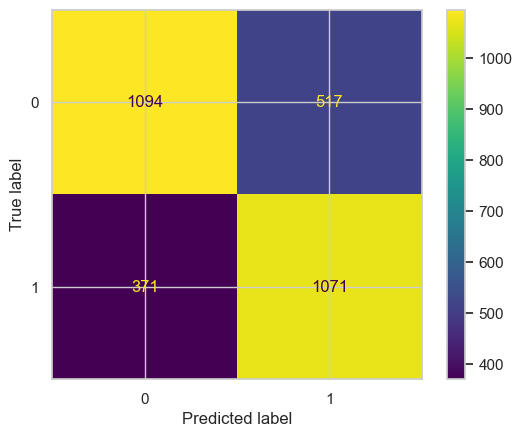

In [108]:
# Generate array of values for confusion matrix
CM = confusion_matrix(Y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

## **CONCLUSION -** 

From the confusion matrix above, it is evident that the Random Forest Machine Learning Model is good at predicting both True Negatives (Top left cornor 1096) and True Positives (Bottom right cornor 1059). The model is very much likely to predict a False Positive (Top right cornor 515) than it would predict a False Negative (Bottom left 383). Hence, The model is more likely to make a Type 1 error. This is less desirable because when there is a false positive, it means that the application would predict the customer to tip but they don't. It is better for the driver to be pleasantly surprised that the customer gave a tip when the driver actually thoguht that the tip would have not been given. 

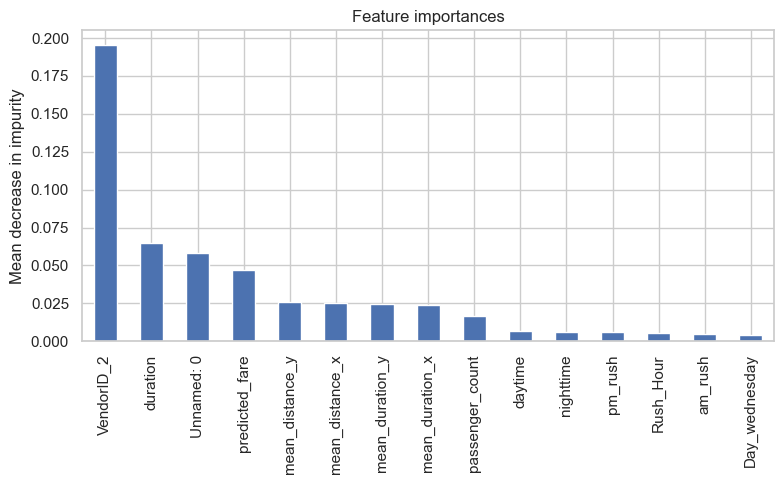

In [109]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

Random Forest model performs acceptably. Its F<sub>1</sub> score was 0.702255 and it had an overall accuracy of 0.705863. It correctly identified ~70.59% of the actual responders in the test set, which is better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback. 

Unfortunately, the Random Forest is not the most transparent machine learning algorithm. We know that `VendorID`, `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that `VendorID` is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.  